#### Traffic signs Lab

1) data augmentation - small shifts, making model (more / less) position invariant



## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.


100%|██████████| 43/43 [00:00<00:00, 2634.31it/s]


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples 

       180 Speed limit (20km/h)
      1980 Speed limit (30km/h)
      2010 Speed limit (50km/h)
      1260 Speed limit (60km/h)
      1770 Speed limit (70km/h)
      1650 Speed limit (80km/h)
       360 End of speed limit (80km/h)
      1290 Speed limit (100km/h)
      1260 Speed limit (120km/h)
      1320 No passing
      1800 No passing for vehicles over 3.5 metric tons
      1170 Right-of-way at the next intersection
      1890 Priority road
      1920 Yield
       690 Stop
       540 No vehicles
       360 Vehicles over 3.5 metric tons prohibited
       990 No entry
      1080 General caution
       180 Dangerous curve to the left
       300 Dangerous curve to the right
       270 Double curve
       330 Bumpy road
       450 Slippery road
       240 Road narrows on the right
      1350 Road work
       540 Traffic signals
       210 Pedestrians
       480 Children 

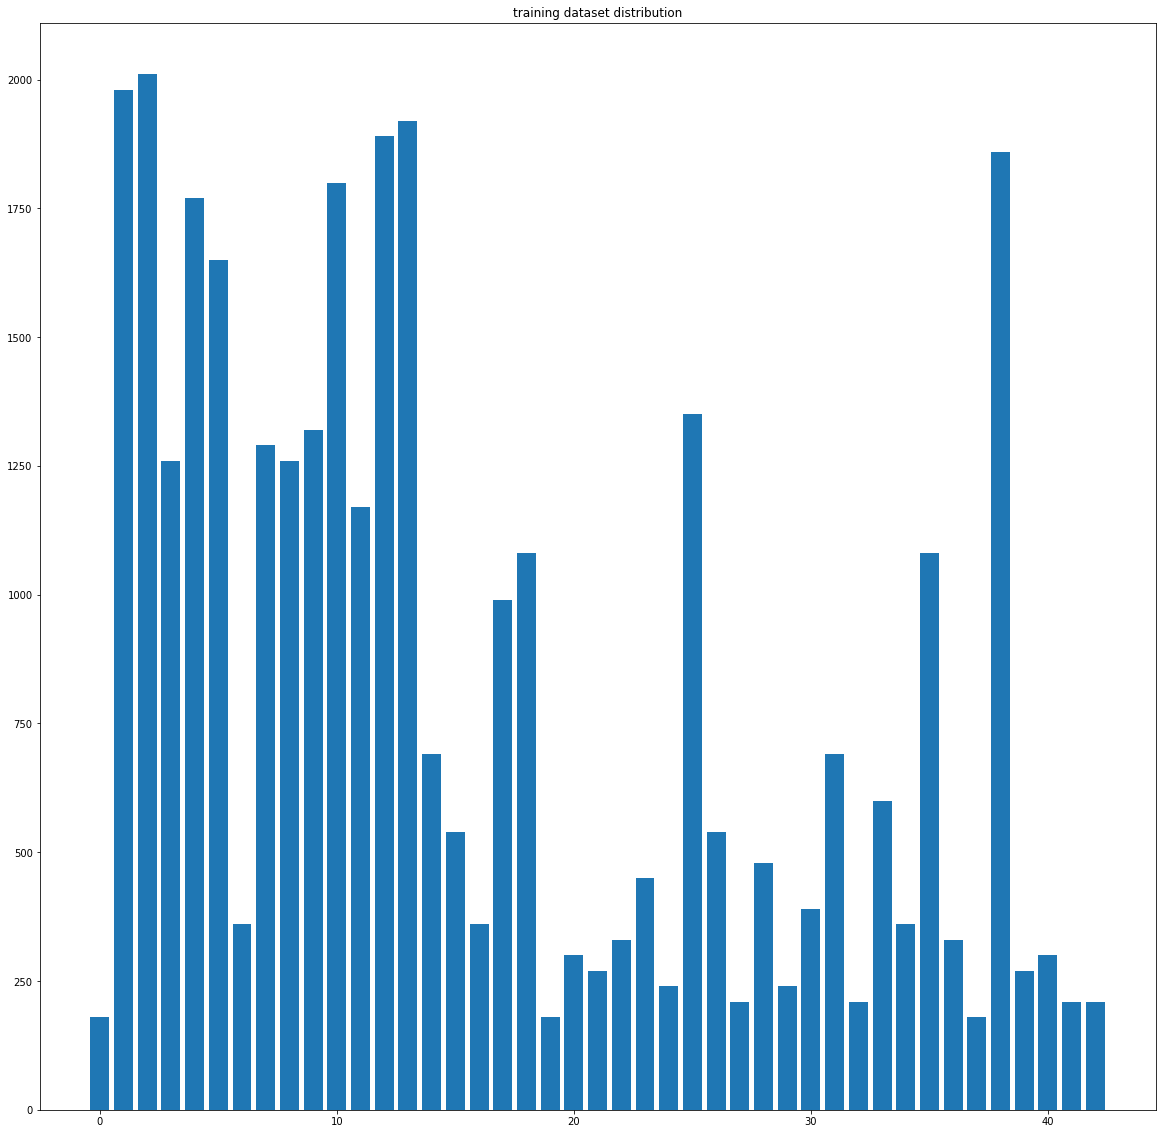

100%|██████████| 43/43 [00:00<00:00, 2707.38it/s]

Training set categories 43
max / min of train images 0 255
        30 Speed limit (20km/h)
       240 Speed limit (30km/h)
       240 Speed limit (50km/h)
       150 Speed limit (60km/h)
       210 Speed limit (70km/h)
       210 Speed limit (80km/h)
        60 End of speed limit (80km/h)
       150 Speed limit (100km/h)
       150 Speed limit (120km/h)
       150 No passing
       210 No passing for vehicles over 3.5 metric tons
       150 Right-of-way at the next intersection
       210 Priority road
       240 Yield
        90 Stop
        90 No vehicles
        60 Vehicles over 3.5 metric tons prohibited
       120 No entry
       120 General caution
        30 Dangerous curve to the left
        60 Dangerous curve to the right
        60 Double curve
        60 Bumpy road
        60 Slippery road
        30 Road narrows on the right
       150 Road work
        60 Traffic signals
        30 Pedestrians
        60 Children crossing
        30 Bicycles crossing
        60 Beware of 

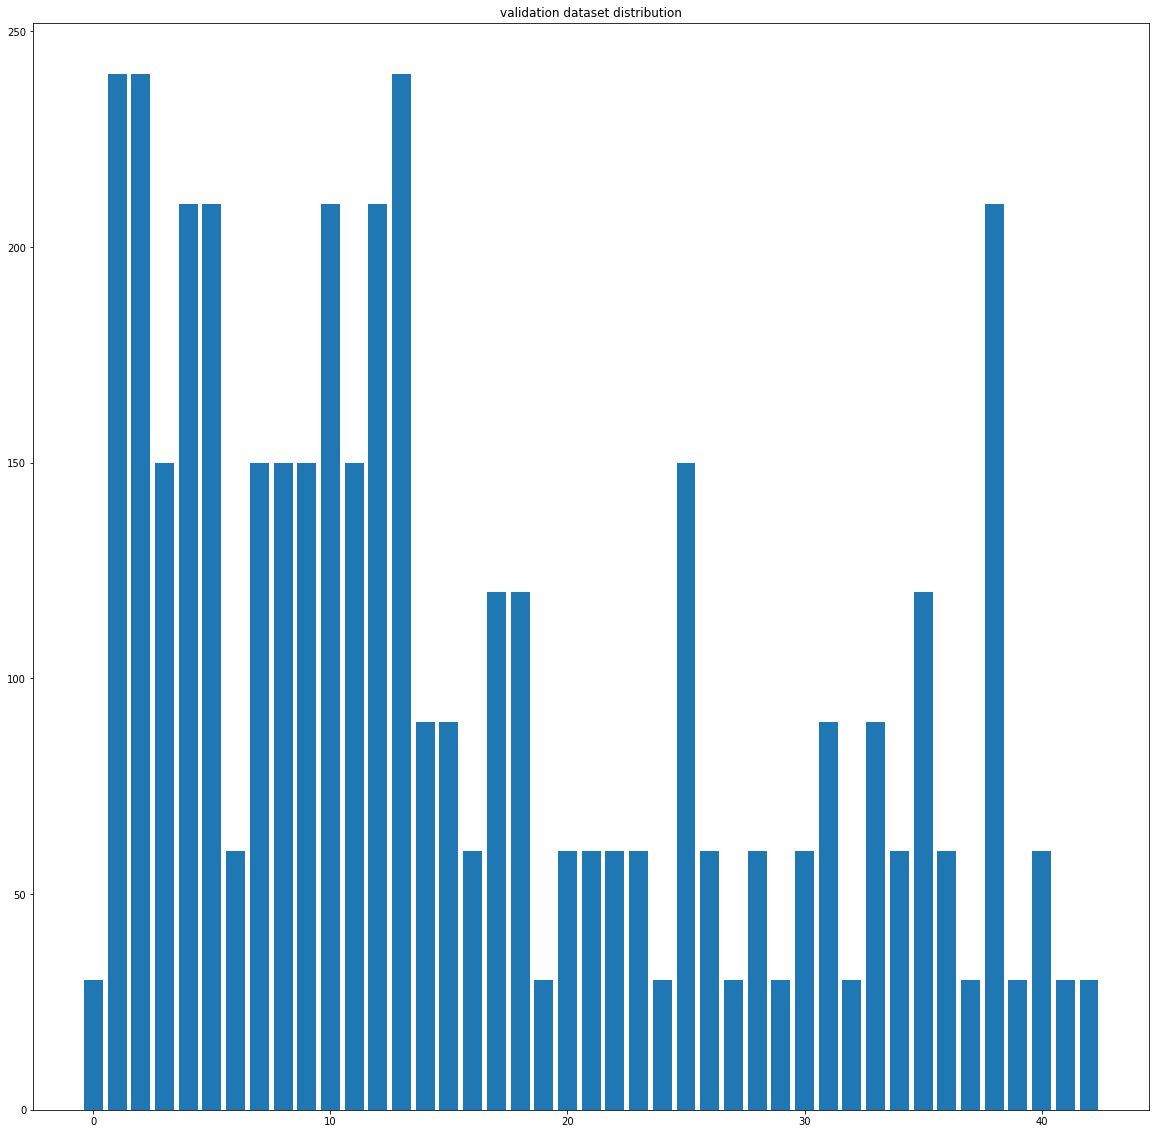

100%|██████████| 43/43 [00:00<00:00, 3003.52it/s]


        60 Speed limit (20km/h)
       720 Speed limit (30km/h)
       750 Speed limit (50km/h)
       450 Speed limit (60km/h)
       660 Speed limit (70km/h)
       630 Speed limit (80km/h)
       150 End of speed limit (80km/h)
       450 Speed limit (100km/h)
       450 Speed limit (120km/h)
       480 No passing
       660 No passing for vehicles over 3.5 metric tons
       420 Right-of-way at the next intersection
       690 Priority road
       720 Yield
       270 Stop
       210 No vehicles
       150 Vehicles over 3.5 metric tons prohibited
       360 No entry
       390 General caution
        60 Dangerous curve to the left
        90 Dangerous curve to the right
        90 Double curve
       120 Bumpy road
       150 Slippery road
        90 Road narrows on the right
       480 Road work
       180 Traffic signals
        60 Pedestrians
       150 Children crossing
        90 Bicycles crossing
       150 Beware of ice/snow
       270 Wild animals crossing
        60 End of

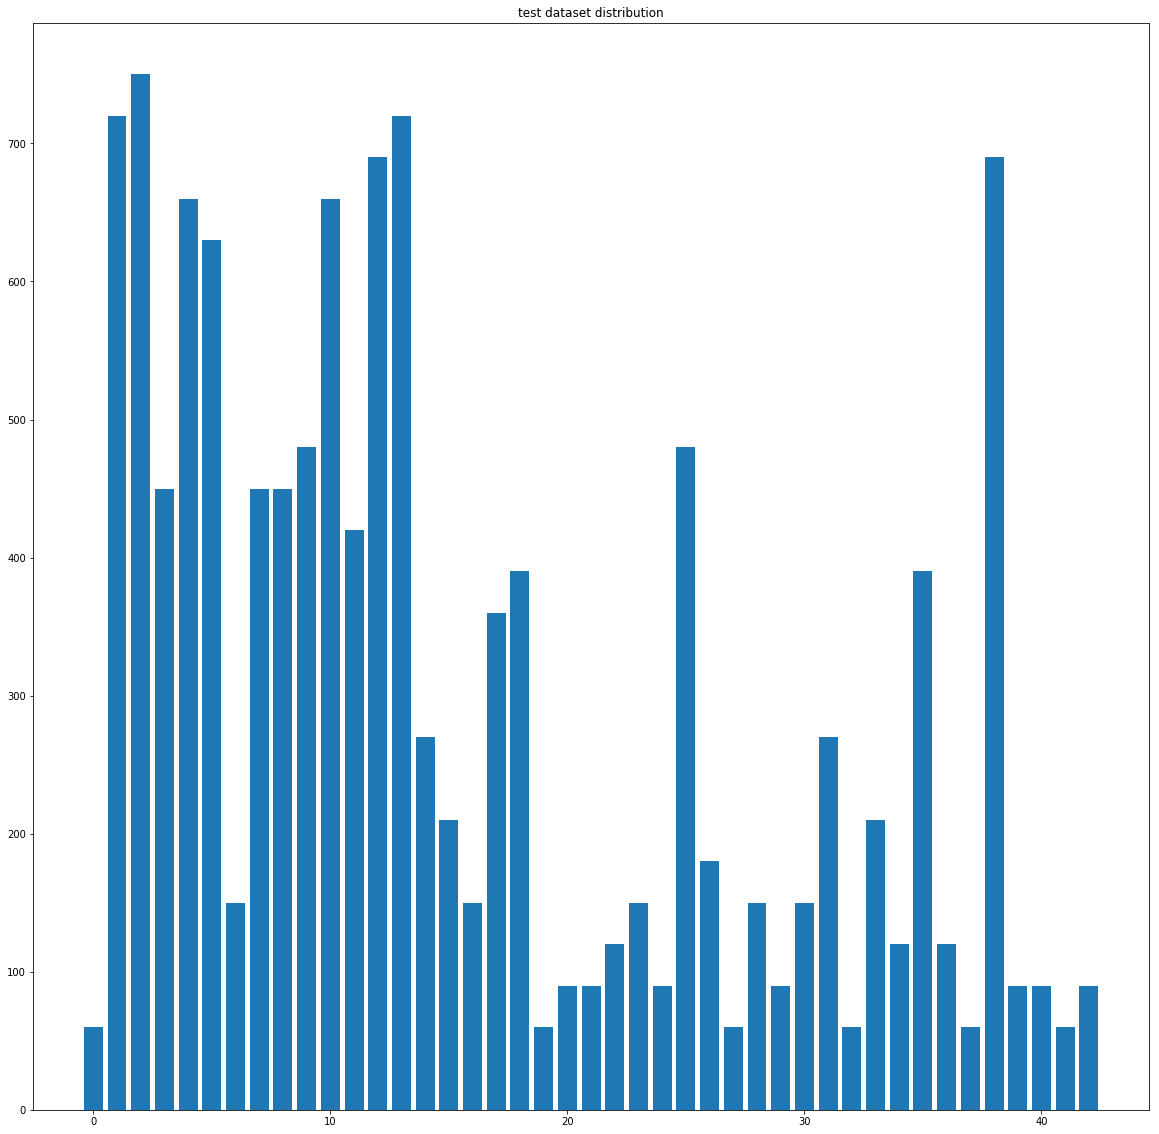

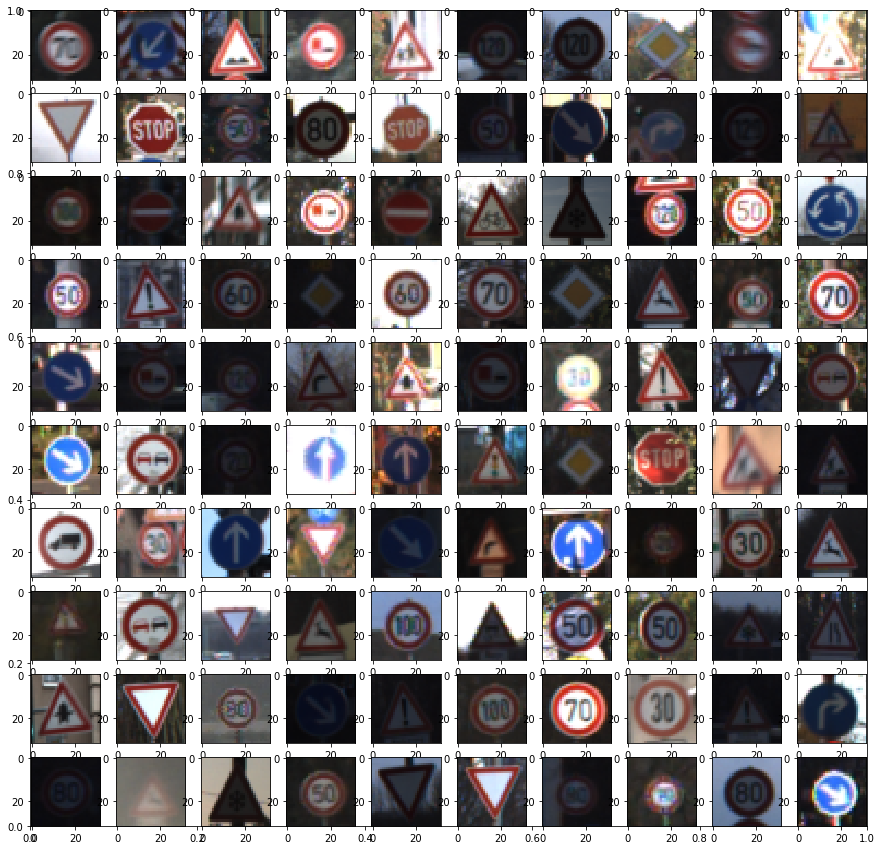

In [79]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import random
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples \n".format(len(X_test)))

#checking numer of categories

categories, counts = np.unique(y_train, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure = plt.figure(figsize=(20,20))
plt.title("training dataset distribution")
plt.bar(categories,counts)
plt.savefig("training.png")
plt.show()


print("Training set categories", len(categories))

#check value image range
print("max / min of train images", np.min(X_train), np.max(X_train))



categories, counts = np.unique(y_valid, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure2 = plt.figure(figsize=(20,20))
plt.title("validation dataset distribution")
plt.bar(categories,counts)
plt.savefig("validation.png")
plt.show()


categories, counts = np.unique(y_test, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')

bar_figure2 = plt.figure(figsize=(20,20))
plt.title("test dataset distribution")
plt.bar(categories,counts)
plt.savefig("test.png")
plt.show()
plot_number = 0

f, axs = plt.subplots(1,1,figsize=(15,15))
for row in range(1,11,1):
    for col in range(1,11,1):
            index = random.randint(0, len(X_train))
            image = X_train[index].squeeze()
            f.add_subplot(10,10, plot_number+1)
            plt.imshow(image)
            plot_number += 1
plt.savefig("sample_signs.png")
plt.show()
plot_number = 0


In [80]:
#gamma correction

temp = []

def histogram_change(img):
    out =[]
    limg = np.array(img)
    #plt.imshow(img)
    #plt.show()
    #print (type(img))
    
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l  = lab[..., 0]
    a, b = lab[...,1], lab[...,2]
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    out = clahe.apply(l)
 
    #plt.imshow(out)
    #plt.show()
    #print (type(out))
    
    limg[...,0] = out
    limg[...,1] = a
    limg[...,2] = b
    
    final_out = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    #plt.imshow(final_out)
    #plt.show()
    
    return final_out

for image in tqdm(X_train):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    #if image_mean < 100:
    #    image3 = np.clip (image+(100-int(image_mean)), 0, 255)
    image3 = histogram_change(image3)
    temp.append(image3)
X_train = temp
temp = []

for image in tqdm(X_valid):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    #if image_mean < 100:
    #    image3 = np.clip (image+(100-int(image_mean)), 0, 255)
    image3 = histogram_change(image3)
    temp.append(image3)
X_valid = temp

temp = []

for image in tqdm(X_test):
    image3 = image
    image_mean = image3.mean()
    contrast = image3.std() 
    #if image_mean < 100:
    #    image3 = np.clip (image+(100-int(image_mean)), 0, 255)
    image3 = histogram_change(image3)
    temp.append(image3)
X_test = temp

100%|██████████| 12630/12630 [00:02<00:00, 4777.80it/s]


In [81]:
#X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
#X_test, y_test = test['features'], test['labels']

tabelka_sorted = []
new_labels = []
plot_number =0
categories, counts = np.unique(train['labels'], return_counts=True)

largest_category = max(counts) 

print('\n')

for cat in range(len(categories)):
    # select all elements from this category
    moj_bin = [a for i, a in enumerate(X_train) if y_train[i]==cat]
    moj_bin = np.array(moj_bin)
    #print ("quantity in this bin", len(moj_bin))
    #calculate the difference between biggest category and this one
    difference = largest_category - len(moj_bin)
    #print ("difference", difference)
    # select random elements with replacement
    additional = np.random.choice(len(moj_bin), difference, replace=True)
    
    ad = moj_bin[additional]
    
    #print("additional elements", ad)
    #print ("moj bin", moj_bin)
    
    #print("additional elements", ad.shape)
    #print ("moj bin", moj_bin.shape)
    

    if difference > 0:
        new = np.concatenate((moj_bin, ad), axis=0)
        #print ("new array shape", new.shape)

        
    else:
        new = moj_bin
    
    # plot multiple signs after "standarization" - turned off for speed
    """
    f, axs = plt.subplots(1,1,figsize=(15,15))
    for row in range(1,11,1):
        for col in range(1,6,1):
            index = random.randint(0, len(new)-1)
            image = new[index].squeeze()
            f.add_subplot(5,10, plot_number+1)
            plt.imshow(image)
            plot_number += 1
    plt.show()
    plot_number = 0
    """
    tabelka_sorted.append(new)
    moj_bin=[]
    #print ('\n\n')

    
print("------")
print (len(tabelka_sorted))

#flatten array and prepare new labels

for i in range(len(tabelka_sorted)):
    for x in range(len(tabelka_sorted[i])):
        new_labels.append(i)

print ("new labels quantity", len(new_labels))
#print ("new labels", new_labels)
    
print ("shape of data", np.array(tabelka_sorted).shape)
tabelka_sorted = np.array(tabelka_sorted).reshape(len(new_labels),32,32,3)

print ("shape of data", np.array(tabelka_sorted).shape)

X_train = tabelka_sorted
y_train = new_labels



------
43
new labels quantity 86430
shape of data (43, 2010, 32, 32, 3)
shape of data (86430, 32, 32, 3)


  0%|          | 0/43 [00:00<?, ?it/s]


Image Shape: (32, 32, 3)

Training Set:   86430 samples
      2010 Speed limit (20km/h)
      2010 Speed limit (30km/h)
      2010 Speed limit (50km/h)
      2010 Speed limit (60km/h)
      2010 Speed limit (70km/h)
      2010 Speed limit (80km/h)
      2010 End of speed limit (80km/h)
      2010 Speed limit (100km/h)
      2010 Speed limit (120km/h)
      2010 No passing
      2010 No passing for vehicles over 3.5 metric tons
      2010 Right-of-way at the next intersection
      2010 Priority road
      2010 Yield
      2010 Stop
      2010 No vehicles
      2010 Vehicles over 3.5 metric tons prohibited
      2010 No entry
      2010 General caution
      2010 Dangerous curve to the left
      2010 Dangerous curve to the right
      2010 Double curve
      2010 Bumpy road
      2010 Slippery road
      2010 Road narrows on the right
      2010 Road work
      2010 Traffic signals
      2010 Pedestrians
      2010 Children crossing
      2010 Bicycles crossing
      2010 Beware of ic

100%|██████████| 43/43 [00:00<00:00, 2475.77it/s]

End of no passing by vehicles over 3.5 metric tons




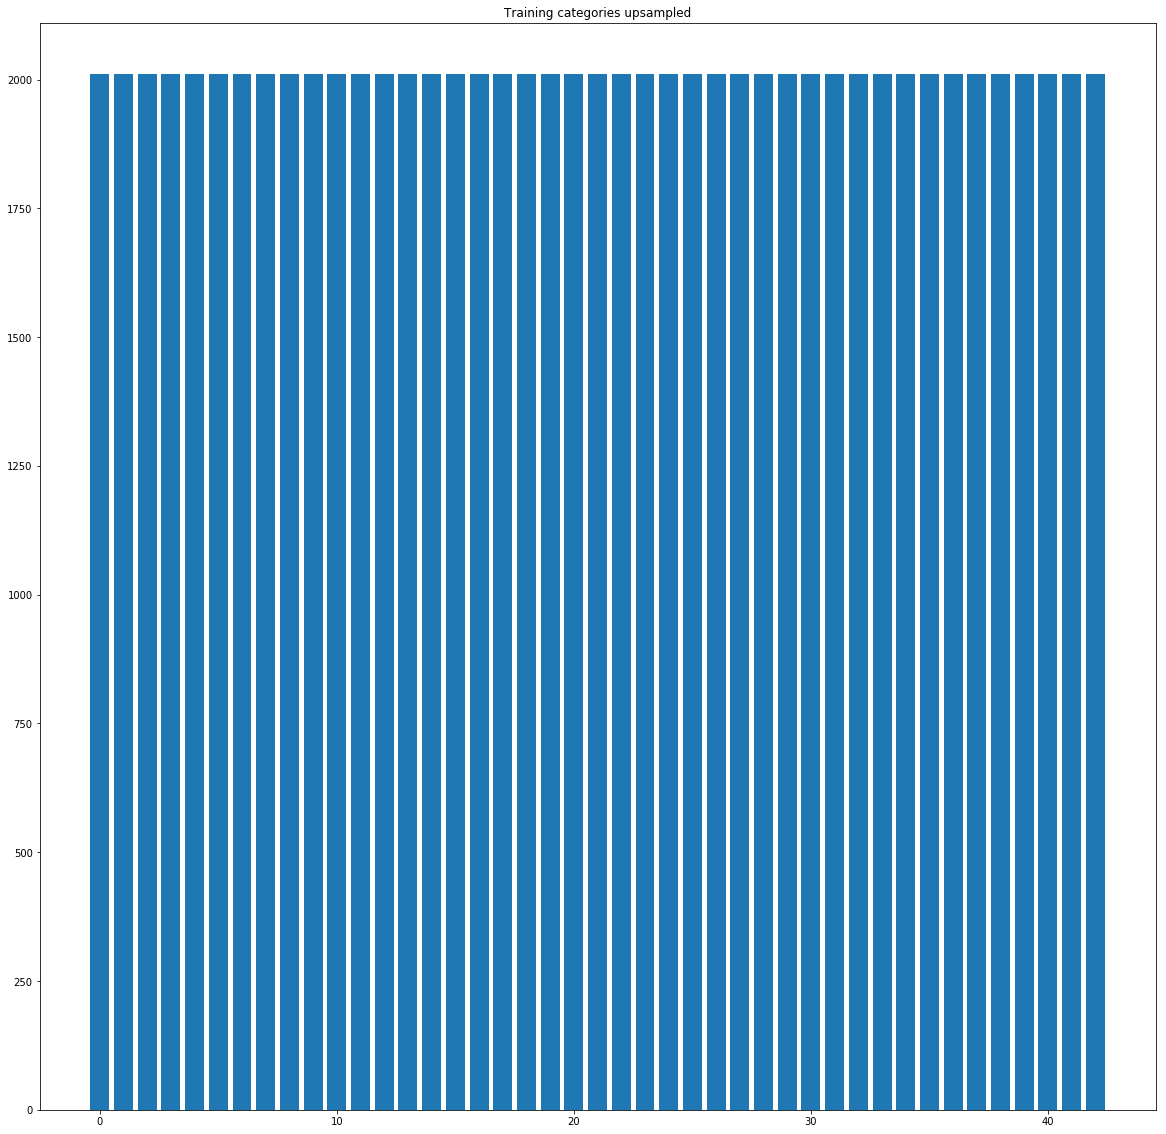

Training set categories 43
max / min of train images 0 255


In [82]:
# data statistics after upsampling

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))

#checking numer of categories

categories, counts = np.unique(y_train, return_counts=True, axis=0)
x = pd.read_csv('signnames.csv')

for i in tqdm(range(len(counts))):
    print ('%10s' % counts[i], x.iloc[i][1])

print ('\n')
plt.figure(figsize=(20,20))
plt.bar(categories,counts)
plt.title("Training categories upsampled")
plt.savefig("training2.png")
plt.show()

print("Training set categories", len(categories))

#check value image range
print("max / min of train images", np.min(X_train), np.max(X_train))


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

1


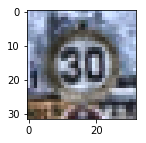

In [83]:
import random


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

Basic normalization

In [84]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_train = np.float32(X_train)
X_valid = np.float32(X_valid)
X_test = np.float32(X_test)

print ("raw data")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))

X_train = (X_train / 255.0) - 0.5
X_valid = (X_valid / 255.0) - 0.5
X_test = (X_test / 255.0) - 0.5

print ("norm / 255 - 0.5")
print("max / min of train images", np.min(X_train), np.max(X_train))
print("max / min of train images", np.min(X_valid), np.max(X_valid))
print("max / min of train images", np.min(X_test), np.max(X_test))



raw data
max / min of train images 0.0 255.0
max / min of train images 0.0 255.0
max / min of train images 0.0 255.0
norm / 255 - 0.5
max / min of train images -0.5 0.5
max / min of train images -0.5 0.5
max / min of train images -0.5 0.5


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [85]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [86]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    filters = tf.Variable(tf.truncated_normal([5,5,3,64], mean=mu, stddev=sigma))
    bias1 = tf.Variable(tf.zeros(64))
    strides = [1,1,1,1]
    padding = 'SAME'
    
    conv1 = tf.nn.conv2d(x,filters,strides,padding) + bias1
   
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # pool1 = tf.nn.max_pool(act1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters2 = tf.Variable(tf.truncated_normal([5,5,64,64], mean=mu, stddev=sigma))
    strides2 = [1,1,1,1]
    bias2 = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1,filters2,strides2,padding='SAME') + bias2
    act2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    pool1 = tf.nn.max_pool(act2,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters3 = tf.Variable(tf.truncated_normal([3,3,64,128], mean=mu, stddev=sigma))
    strides3 = [1,1,1,1]
    bias3 = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(pool1,filters3,strides3,padding='SAME') + bias3   
    act3 = tf.nn.relu(conv3)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filters4 = tf.Variable(tf.truncated_normal([3,3,128,128], mean=mu, stddev=sigma))
    strides4 = [1,1,1,1]
    bias4 = tf.Variable(tf.zeros(128))
    conv4 = tf.nn.conv2d(conv3,filters4,strides4,padding='SAME') + bias4
    act4 = tf.nn.relu(conv4)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    pool2 = tf.nn.max_pool(act4,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    flatten_layer = flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    ff1_weights = tf.Variable(tf.truncated_normal([8192,120], mean=mu, stddev=sigma))
    ff1_bias = tf.Variable(tf.zeros(120))
    
    ff1 = tf.matmul(flatten_layer,ff1_weights) + ff1_bias
    
    # TODO: Activation.
    
    act3 = tf.nn.relu(ff1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    ff2_weights = tf.Variable(tf.truncated_normal([120,84], mean=mu, stddev=sigma))
    ff2_bias = tf.Variable(tf.zeros(84))
    ff2 = tf.matmul (act3, ff2_weights) + ff2_bias
    # TODO: Activation.
    
    act4 = tf.nn.relu(ff2)


    dropout = tf.nn.dropout(act4, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    
    log_weights = tf.Variable(tf.truncated_normal([84,43], mean=mu, stddev=sigma))
    log_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dropout,log_weights) + log_bias
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [87]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [88]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [89]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [90]:
def bright_change(image):
    image4 = image 
    bright = image4.mean()
    print ("brightness", bright)
    image4 = cv2.cvtColor(image4,cv2.COLOR_BGR2HSV)
    v = image4[...,2]
    print ("v",v)
    brightness_change = np.random.randint(-40,40)
    v2 = np.clip(np.add(v,brightness_change), 0, 255)
    print ("v2",v2)
    image4[...,2] = v2
    image4 = cv2.cvtColor(image4,cv2.COLOR_HSV2BGR)
    return image4
    
def position_change(image):
    image4 = image 
    shift_x = np.random.randint(-3,3)
    shift_y = np.random.randint(-3,3)
    #print ("shifts",shift_x,shift_y)
    move_matrix = np.float32([[1,0,shift_x],[0,1,shift_y]])
    image5 = cv2.warpAffine(image4,move_matrix,(32,32))
    return image5
    
def blur_change(image):
    image6 = image 
    image_sharpness = cv2.Laplacian(image6, cv2.CV_64F).var()
    
    if image_sharpness > 150:
        size = np.random.randint(1,5)
        kernel = np.zeros((size,size))
        kernel[int((size-1)/2),:] = np.ones(size)
        kernel = kernel / size
        print (kernel)

        image6 = cv2.filter2D(image6, -1 ,kernel)
        print (cv2.Laplacian(image6, cv2.CV_64F).var())
    else:
        #print ("not so sharp")
        pass
    return image6

def scale_change(image):
    image7 = image 
    scale = np.random.uniform(0.8,1.2)
    print (scale)
    if scale > 1:
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_CUBIC)
        start_x = int((image7.shape[0]-32)/2)
        start_y = int((image7.shape[0]-32)/2)
        image8 = image7[start_x:start_x+32 , start_y:start_y+32]
        #crop
    else:
        scale =  (scale * 32 - (scale *32 %2)) / 32
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_AREA)
        print ("before padding", image7.shape)
        horiz_pad = np.ceil((32-image7.shape[0])/2) 
        vertical_pad = np.ceil((32-image7.shape[1])/2) 
        print ("padding", horiz_pad, vertical_pad)
        horiz_pad = int(horiz_pad)
        vertical_pad = int(vertical_pad)
        image8 = cv2.copyMakeBorder(image7, horiz_pad, horiz_pad, vertical_pad, vertical_pad, cv2.BORDER_CONSTANT, (0,0,0))
    return image8
        
def batch_aug(batch):
    new_batch = []
    for image in batch:
        #changed = scale_change(image)
        #  add shift
        #changed = blur_change(changed)
        changed = position_change(image)
        
        new_batch.append(changed)
    return new_batch

def batch_generator():
    batch_x = 0
    batch_y = 0
    offset = 0
    plot_number = 0 
    while True:
        end = offset + BATCH_SIZE
        #print (offset)
        #print (end)
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        """
        #print (batch_x)
        f, axs = plt.subplots(1,1,figsize=(15,15))
        for row in range(1,9,1):
            for col in range(1,5,1):
                
                image = batch_x[plot_number].squeeze()
                f.add_subplot(4,8, plot_number+1)
                plt.imshow(image)
                plot_number += 1
    
        plt.show()
        plot_number = 0
        """
        batch_x = batch_aug(batch_x)
        #print (batch_x)
        """
        f, axs = plt.subplots(1,1,figsize=(15,15))
        for row in range(1,9,1):
            for col in range(1,5,1):
                
                image = batch_x[plot_number].squeeze()
                f.add_subplot(4,8, plot_number+1)
                plt.imshow(image)
                plot_number += 1
    
        plt.show()
        plot_number = 0
        """        
        offset = end
        yield batch_x, batch_y
       

In [91]:
best_accuracy = 0
proper_generator = batch_generator()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            #end = offset + BATCH_SIZE
            batch_x, batch_y = next(proper_generator)
            #batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
        
        proper_generator = batch_generator()
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        # saving best model possible
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy (no augmentation, only prep)= {:.4f}".format(training_accuracy))
        print("Validation Accuracy (no augmentation, only prep)= {:.4f}".format(validation_accuracy))
        print()
        
    

Training...



100%|██████████| 35/35 [00:00<00:00, 87.19it/s]


Model saved
EPOCH 1 ...
Train Accuracy (no augmentation, only prep)= 0.8627
Validation Accuracy (no augmentation, only prep)= 0.7567



100%|██████████| 35/35 [00:00<00:00, 87.18it/s]


Model saved
EPOCH 2 ...
Train Accuracy (no augmentation, only prep)= 0.9779
Validation Accuracy (no augmentation, only prep)= 0.9483



100%|██████████| 35/35 [00:00<00:00, 87.51it/s]


Model saved
EPOCH 3 ...
Train Accuracy (no augmentation, only prep)= 0.9919
Validation Accuracy (no augmentation, only prep)= 0.9517



100%|██████████| 35/35 [00:00<00:00, 85.36it/s]


Model saved
EPOCH 4 ...
Train Accuracy (no augmentation, only prep)= 0.9951
Validation Accuracy (no augmentation, only prep)= 0.9667



100%|██████████| 35/35 [00:00<00:00, 86.84it/s]


Model saved
EPOCH 5 ...
Train Accuracy (no augmentation, only prep)= 0.9955
Validation Accuracy (no augmentation, only prep)= 0.9760



100%|██████████| 35/35 [00:00<00:00, 87.18it/s]


EPOCH 6 ...
Train Accuracy (no augmentation, only prep)= 0.9897
Validation Accuracy (no augmentation, only prep)= 0.9515



100%|██████████| 35/35 [00:00<00:00, 87.30it/s]


Model saved
EPOCH 7 ...
Train Accuracy (no augmentation, only prep)= 0.9947
Validation Accuracy (no augmentation, only prep)= 0.9769



100%|██████████| 35/35 [00:00<00:00, 86.94it/s]


EPOCH 8 ...
Train Accuracy (no augmentation, only prep)= 0.9969
Validation Accuracy (no augmentation, only prep)= 0.9735



100%|██████████| 35/35 [00:00<00:00, 84.67it/s]


EPOCH 9 ...
Train Accuracy (no augmentation, only prep)= 0.9975
Validation Accuracy (no augmentation, only prep)= 0.9737



100%|██████████| 35/35 [00:00<00:00, 87.54it/s]


Model saved
EPOCH 10 ...
Train Accuracy (no augmentation, only prep)= 0.9956
Validation Accuracy (no augmentation, only prep)= 0.9823



100%|██████████| 35/35 [00:00<00:00, 86.22it/s]


EPOCH 11 ...
Train Accuracy (no augmentation, only prep)= 0.9946
Validation Accuracy (no augmentation, only prep)= 0.9619



100%|██████████| 35/35 [00:00<00:00, 86.18it/s]


EPOCH 12 ...
Train Accuracy (no augmentation, only prep)= 0.9980
Validation Accuracy (no augmentation, only prep)= 0.9780



100%|██████████| 35/35 [00:00<00:00, 86.94it/s]


EPOCH 13 ...
Train Accuracy (no augmentation, only prep)= 0.9971
Validation Accuracy (no augmentation, only prep)= 0.9721



100%|██████████| 35/35 [00:00<00:00, 85.28it/s]


EPOCH 14 ...
Train Accuracy (no augmentation, only prep)= 0.9972
Validation Accuracy (no augmentation, only prep)= 0.9787



100%|██████████| 35/35 [00:00<00:00, 87.94it/s]


EPOCH 15 ...
Train Accuracy (no augmentation, only prep)= 0.9941
Validation Accuracy (no augmentation, only prep)= 0.9680



100%|██████████| 35/35 [00:00<00:00, 88.07it/s]


EPOCH 16 ...
Train Accuracy (no augmentation, only prep)= 0.9988
Validation Accuracy (no augmentation, only prep)= 0.9778



100%|██████████| 35/35 [00:00<00:00, 87.31it/s]


EPOCH 17 ...
Train Accuracy (no augmentation, only prep)= 0.9977
Validation Accuracy (no augmentation, only prep)= 0.9707



100%|██████████| 35/35 [00:00<00:00, 88.37it/s]


EPOCH 18 ...
Train Accuracy (no augmentation, only prep)= 0.9973
Validation Accuracy (no augmentation, only prep)= 0.9658



100%|██████████| 35/35 [00:00<00:00, 87.55it/s]


EPOCH 19 ...
Train Accuracy (no augmentation, only prep)= 0.9988
Validation Accuracy (no augmentation, only prep)= 0.9785



100%|██████████| 35/35 [00:00<00:00, 84.98it/s]


EPOCH 20 ...
Train Accuracy (no augmentation, only prep)= 0.9972
Validation Accuracy (no augmentation, only prep)= 0.9821



 30%|██▉       | 201/676 [00:08<00:20, 23.19it/s]


KeyboardInterrupt: 

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))